In [2]:
import librosa
import pandas as pd
import os

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=5)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
        zero_crossings = librosa.feature.zero_crossing_rate(y).mean()
        rmse = librosa.feature.rms(y=y).mean()
        chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
        tempo = librosa.beat.tempo(y=y, sr=sr)[0]
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr).mean(axis=1)
        
        return [*mfccs, spectral_centroid, spectral_bandwidth, zero_crossings, rmse, *chroma, tempo, *spectral_contrast, *tonnetz]
    except PermissionError:
        print(f"Permission denied for file: {file_path}")
        return None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Define dataset path
dataset_path = r'C:\Users\Marwan\Desktop\node session 4\AI\1Ss'
features = []
file_names = []

# Traverse all subfolders
for root, _, files in os.walk(dataset_path):
    label = os.path.basename(root)  # Folder name is the label
    for file_name in files:
        file_path = os.path.join(root, file_name)
        if file_path.endswith('.wav'):  # Ensure it's an audio file
            print(f"Processing file: {file_path}")
            data = extract_features(file_path)
            if data is not None:
                features.append([file_name] + data + [label])  # Add file name
                file_names.append(file_name)

# Define columns (add File_Name column)
columns = (
    ['File_Name'] +  # Add file name column
    [f'MFCC{i+1}' for i in range(13)] +  # 13 MFCCs
    ['SpectralCentroid', 'SpectralBandwidth', 'ZeroCrossingRate', 'RMSE'] +  # 4 spectral features
    [f'Chroma_{i+1}' for i in range(12)] +  # 12 chroma features
    ['Tempo'] +  # 1 tempo feature
    [f'SpectralContrast_{i+1}' for i in range(7)] +  # 7 spectral contrast features
    [f'Tonnetz_{i+1}' for i in range(6)] +  # 6 tonnetz features
    ['Label']  # 1 label column
)

# Save extracted features with file names
df = pd.DataFrame(features, columns=columns)
df.to_csv('features_extracted.csv', index=False)
print("Feature extraction completed and saved to 'features_with_filenames.csv'.")


Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063001030.wav


C:\Users\Marwan\AppData\Local\Temp\ipykernel_7928\963619476.py:14: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]
g:\Marwan\Documents\Menna graduation project\node session 4\myenv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
g:\Marwan\Documents\Menna graduation project\node session 4\myenv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063002030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063003030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063004030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063005030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063006030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063007030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063008030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063009030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063010030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063011030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063012030.wav
Processing

g:\Marwan\Documents\Menna graduation project\node session 4\myenv\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063021030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063022030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063023030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063024030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063025030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063026030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063027030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063028030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063029030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063030030.wav
Processing file: C:\Users\Marwan\Desktop\node session 4\AI\1Ss\1s_asphyxia\0063031030.wav
Processing

In [3]:
print("Number of features extracted per file:", len(features[0]))

Number of features extracted per file: 45


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('features_extracted.csv')
print(data.head())

        File_Name      MFCC1      MFCC2      MFCC3      MFCC4      MFCC5  \
0  0063001030.wav -473.05225  113.95849  26.192762  25.800596  14.437183   
1  0063002030.wav -542.80590  158.46207   0.639339  54.239750   8.603868   
2  0063003030.wav -527.94556  197.54482 -40.328430  72.448880  -2.549504   
3  0063004030.wav -498.12033  168.61700 -49.961098  53.567470   4.867584   
4  0063005030.wav -619.92523  169.15312 -13.254050  65.282845   9.506324   

       MFCC6      MFCC7      MFCC8      MFCC9  ...  SpectralContrast_5  \
0  13.422189  13.513610   5.985388  10.760735  ...           14.811307   
1  11.018467  19.145884 -10.736085  14.317471  ...           15.940881   
2  14.689251  29.544487 -17.800402  24.098640  ...           14.024104   
3  21.602678  27.348774 -14.835354  28.228468  ...           15.711965   
4  20.564035  31.905718  -4.154797  23.969444  ...           13.962852   

   SpectralContrast_6  SpectralContrast_7  Tonnetz_1  Tonnetz_2  Tonnetz_3  \
0           45.10474

In [6]:
if 'Label' in data.columns:
    print("Columns before updating labels:", data.columns)

    # Replace string labels with numeric values
    label_mapping = {
        "1s_asphyxia": 0,
        "1s_deaf": 1,
        "1s_hunger": 2,
        "1s_normal": 3,
        "1s_pain": 4
    }

    # Replace labels in the 'Label' column
    data['Label'] = data['Label'].replace(label_mapping)

    print("Columns after updating labels:", data.columns)
    print("First few rows after updating labels:")
    print(data.head())  # Print the first few rows to verify

    # Save the updated dataset
    data.to_csv('updated_labels_dataset.csv', index=False)
    print("Labels converted to numeric and saved.")
else:
    print("Warning: 'Label' column not found in the dataset.")

Columns before updating labels: Index(['File_Name', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6',
       'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13',
       'SpectralCentroid', 'SpectralBandwidth', 'ZeroCrossingRate', 'RMSE',
       'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6',
       'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11',
       'Chroma_12', 'Tempo', 'SpectralContrast_1', 'SpectralContrast_2',
       'SpectralContrast_3', 'SpectralContrast_4', 'SpectralContrast_5',
       'SpectralContrast_6', 'SpectralContrast_7', 'Tonnetz_1', 'Tonnetz_2',
       'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'Label'],
      dtype='object')
Columns after updating labels: Index(['File_Name', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6',
       'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13',
       'SpectralCentroid', 'SpectralBandwidth', 'ZeroCrossingRate', 'RMSE',
       'Chroma_1', 'Chroma_

C:\Users\Marwan\AppData\Local\Temp\ipykernel_7928\3080073024.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace(label_mapping)


Labels converted to numeric and saved.


In [7]:
data = pd.read_csv('updated_labels_dataset.csv')
print(data.tail())

           File_Name       MFCC1      MFCC2       MFCC3      MFCC4      MFCC5  \
2263  0074035002.wav  -92.440710  198.86640 -110.228420  45.092228 -33.678158   
2264  0074036002.wav -111.956430  200.38632 -109.413055  32.068690 -36.033875   
2265  0074037002.wav  -81.609980  181.14300 -119.868890  53.748814 -48.880882   
2266  0074038002.wav -118.879326  198.27968 -113.351830  28.376617 -25.837280   
2267  0074039002.wav -147.897870  157.01357 -109.504295  37.731777 -48.840916   

          MFCC6      MFCC7      MFCC8      MFCC9  ...  SpectralContrast_5  \
2263 -26.171385   4.008824 -32.259083  19.994495  ...           16.251946   
2264 -30.353472   2.081332 -26.313744  21.172594  ...           17.198123   
2265 -30.435999  10.154954 -27.907598  33.400580  ...           16.691088   
2266 -28.056181   2.907014 -23.081419  13.709901  ...           16.650141   
2267 -34.459110  10.586333 -12.420136  36.169655  ...           20.030702   

      SpectralContrast_6  SpectralContrast_7  Tonn

In [8]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
File_Name             0
MFCC1                 0
MFCC2                 0
MFCC3                 0
MFCC4                 0
MFCC5                 0
MFCC6                 0
MFCC7                 0
MFCC8                 0
MFCC9                 0
MFCC10                0
MFCC11                0
MFCC12                0
MFCC13                0
SpectralCentroid      0
SpectralBandwidth     0
ZeroCrossingRate      0
RMSE                  0
Chroma_1              0
Chroma_2              0
Chroma_3              0
Chroma_4              0
Chroma_5              0
Chroma_6              0
Chroma_7              0
Chroma_8              0
Chroma_9              0
Chroma_10             0
Chroma_11             0
Chroma_12             0
Tempo                 0
SpectralContrast_1    0
SpectralContrast_2    0
SpectralContrast_3    0
SpectralContrast_4    0
SpectralContrast_5    0
SpectralContrast_6    0
SpectralContrast_7    0
Tonnetz_1             0
Tonnetz_2             0
Tonnetz_3             0

In [9]:
print(data.columns)

Index(['File_Name', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6',
       'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13',
       'SpectralCentroid', 'SpectralBandwidth', 'ZeroCrossingRate', 'RMSE',
       'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6',
       'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11',
       'Chroma_12', 'Tempo', 'SpectralContrast_1', 'SpectralContrast_2',
       'SpectralContrast_3', 'SpectralContrast_4', 'SpectralContrast_5',
       'SpectralContrast_6', 'SpectralContrast_7', 'Tonnetz_1', 'Tonnetz_2',
       'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'Label'],
      dtype='object')


In [10]:
data.shape

(2268, 45)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   File_Name           2268 non-null   object 
 1   MFCC1               2268 non-null   float64
 2   MFCC2               2268 non-null   float64
 3   MFCC3               2268 non-null   float64
 4   MFCC4               2268 non-null   float64
 5   MFCC5               2268 non-null   float64
 6   MFCC6               2268 non-null   float64
 7   MFCC7               2268 non-null   float64
 8   MFCC8               2268 non-null   float64
 9   MFCC9               2268 non-null   float64
 10  MFCC10              2268 non-null   float64
 11  MFCC11              2268 non-null   float64
 12  MFCC12              2268 non-null   float64
 13  MFCC13              2268 non-null   float64
 14  SpectralCentroid    2268 non-null   float64
 15  SpectralBandwidth   2268 non-null   float64
 16  ZeroCr

In [12]:
data['Label'].value_counts()

Label
1    879
3    507
2    350
0    340
4    192
Name: count, dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MFCC1,2268.0,-227.206392,110.493691,-637.344200,-294.309680,-213.619575,-158.091765,46.009460
MFCC2,2268.0,121.256757,83.231625,-104.174580,70.050495,152.459505,187.358685,266.168760
MFCC3,2268.0,-102.786588,49.290093,-222.211560,-141.171350,-104.330042,-60.972524,29.320690
MFCC4,2268.0,25.610227,35.190344,-48.374340,-4.489205,23.861570,55.136544,114.290695
MFCC5,2268.0,-11.179105,27.013309,-76.383316,-33.321203,-13.287494,10.927923,71.249664
MFCC6,2268.0,-28.758744,26.637153,-102.248850,-49.141092,-25.537898,-10.020893,28.450712
MFCC7,2268.0,10.534840,22.275248,-56.956303,-4.815150,16.574249,27.951558,55.643932
MFCC8,2268.0,-5.555799,18.909090,-58.188725,-20.153868,-7.122704,9.488082,41.151955
MFCC9,2268.0,1.755216,23.959910,-48.448853,-19.151579,-0.248016,24.472719,49.999230
MFCC10,2268.0,-3.074477,13.555787,-39.069645,-13.151094,-4.751864,6.496193,35.578970


In [14]:
print(df['Label'].value_counts())
print(df['Label'].unique())  # Check all unique numeric labels

Label
1s_deaf        879
1s_normal      507
1s_hunger      350
1s_asphyxia    340
1s_pain        192
Name: count, dtype: int64
['1s_asphyxia' '1s_deaf' '1s_hunger' '1s_normal' '1s_pain']


<Axes: xlabel='Label', ylabel='count'>

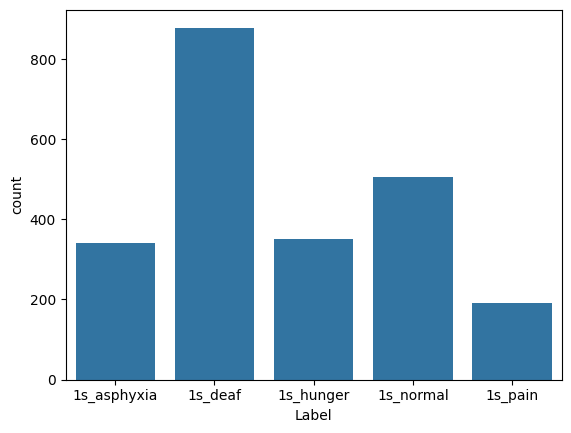

In [15]:
import seaborn as sns
sns.countplot(x='Label', data=df)

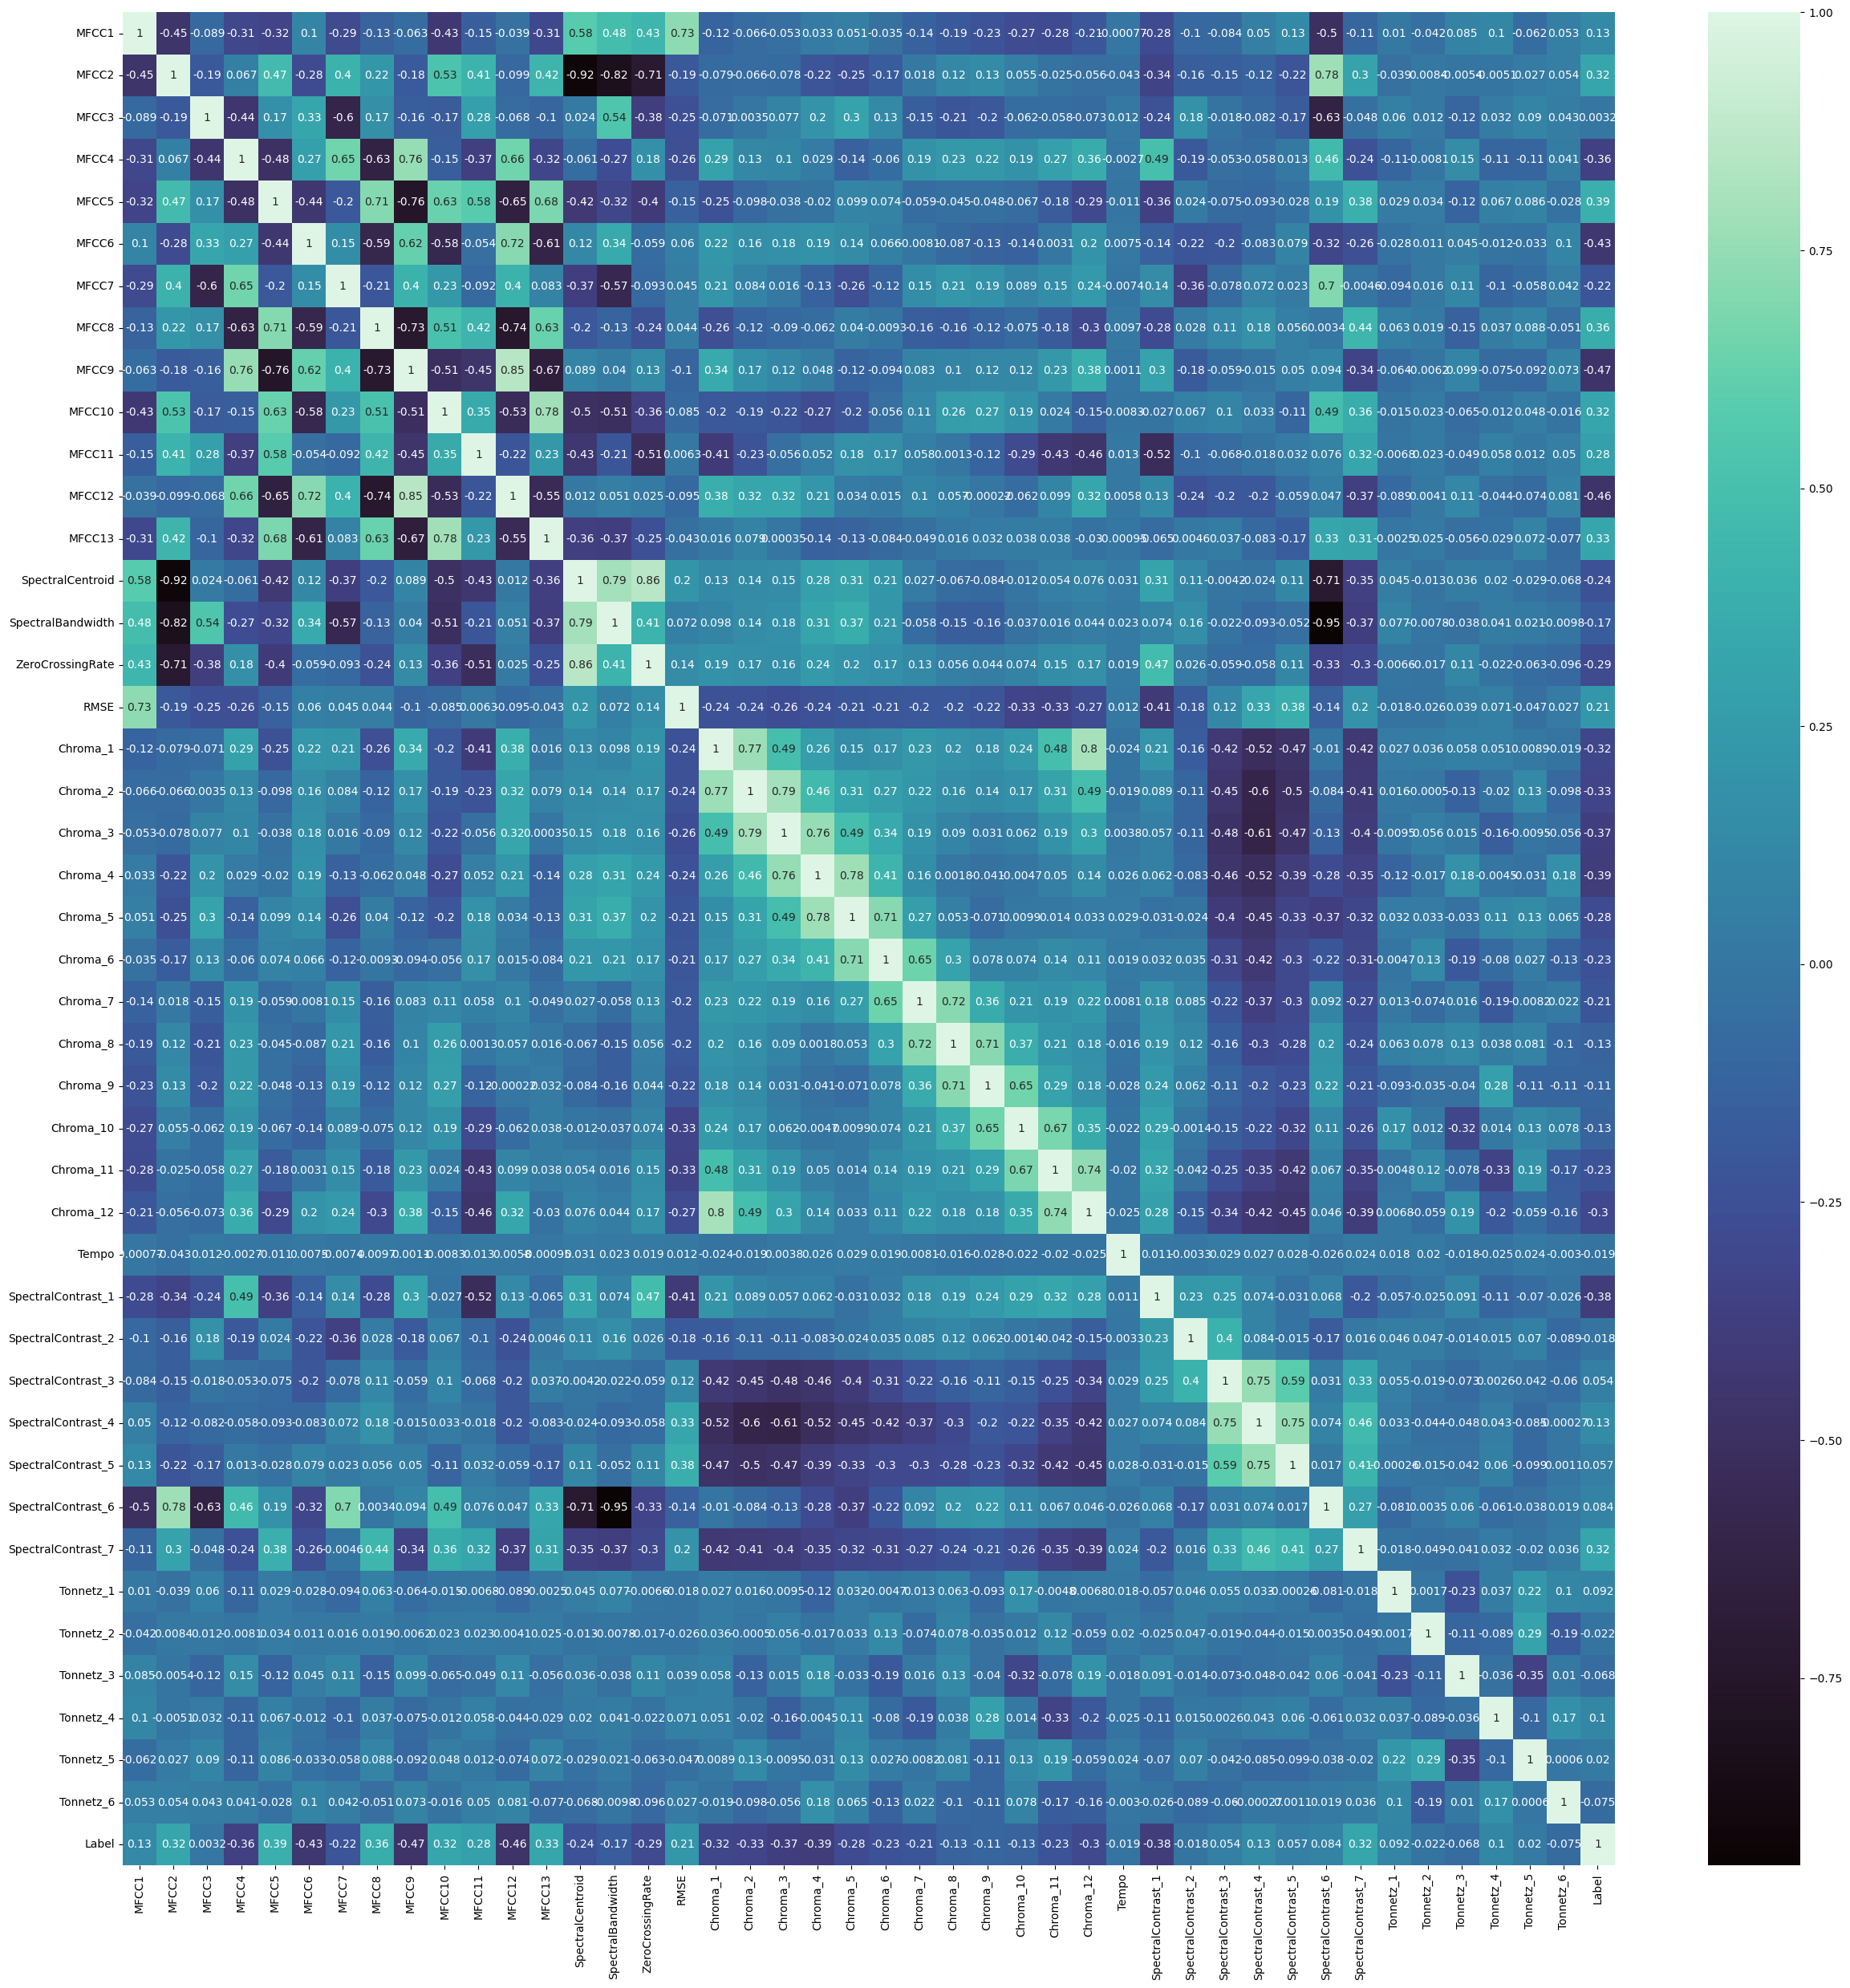

In [16]:
plt.figure(figsize=(30,30))

# Drop 'File_Name' column if it exists
numeric_data = data.drop(columns=["File_Name"], errors="ignore") 

# Compute correlation and plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="mako")
plt.show()

#########################################################################################3

# # Drop 'File_Name' and any non-numeric columns
# numeric_data = data.select_dtypes(include=['number'])

# # Optional: print to verify
# print("Numeric columns used for heatmap:", numeric_data.columns)

# # Plot correlation heatmap
# plt.figure(figsize=(30, 30))
# sns.heatmap(numeric_data.corr(), annot=True, cmap="mako")
# plt.title("Feature Correlation Heatmap", fontsize=20)
# plt.show()


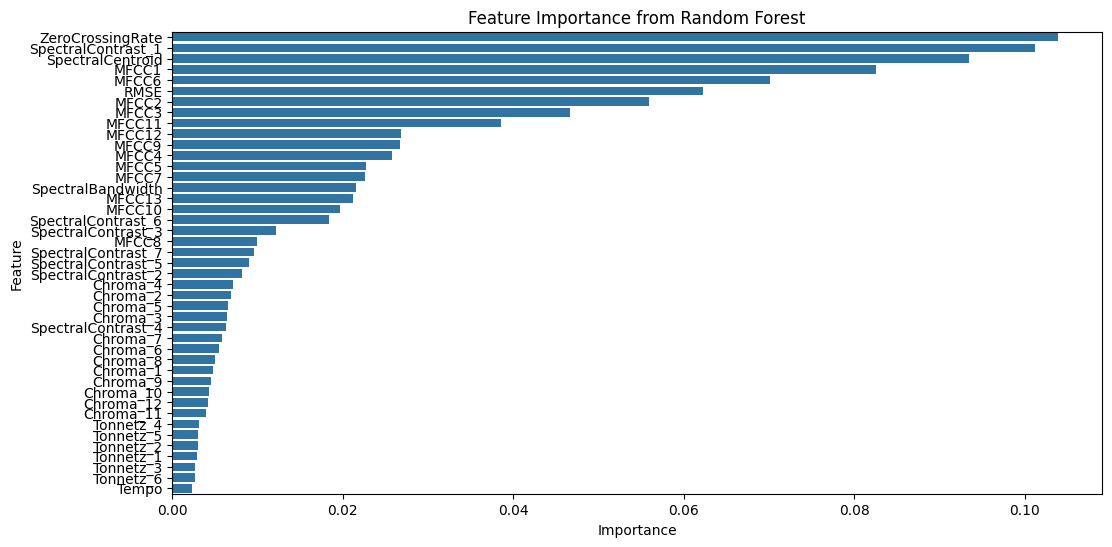

Model Accuracy with Selected Features: 0.9427
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.99      1.00      1.00       176
           2       0.86      0.93      0.89        70
           3       1.00      0.91      0.95       102
           4       0.75      0.71      0.73        38

    accuracy                           0.94       454
   macro avg       0.91      0.91      0.91       454
weighted avg       0.94      0.94      0.94       454



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. Load and Preprocess Data
# ========================

# Load the dataset (Ensure it matches your actual CSV file)
data = pd.read_csv("updated_labels_dataset.csv")

# Drop the "File_Name" column if present
if "File_Name" in data.columns:
    data = data.drop(columns=["File_Name"])

# Separate features and labels
X = data.drop(columns=["Label"])  # Ensure "Label" is the correct column name
y = data["Label"]

# ========================
# 2. Feature Selection using Random Forest
# ========================

# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance from Random Forest")
plt.show()

# Select top N features (e.g., top 20)
selected_features = feature_importances.head(20)['Feature'].values
X_selected = X[selected_features]

# ========================
# 3. Train-Test Split with Stratification
# ========================

# Ensure a logical and balanced split using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y  # Ensures class distribution is preserved
)

# ========================
# 4. Train Model on Selected Features
# ========================

# Train a new model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train, y_train)

# ========================
# 5. Evaluate Performance
# ========================

y_pred = rf_selected.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Selected Features: {accuracy:.4f}")
print(classification_report(y_test, y_pred))



In [18]:
import joblib

# Save the trained model
joblib.dump(rf_selected, "random_forest_model.pkl")

# Save the selected features (for consistency during testing)
joblib.dump(selected_features, "selected_features.pkl")

['selected_features.pkl']

In [19]:
# Save test features
X_test.to_csv("X_test.csv", index=False)

# Save test labels
y_test.to_csv("y_test.csv", index=False)

In [20]:
# Load the model
rf_loaded = joblib.load("random_forest_model.pkl")

# Load the selected features
selected_features = joblib.load("selected_features.pkl")

# Load new test data (replace with actual data)
test_data = pd.read_csv("X_test.csv")  # Ensure this matches the training format

# Select only the relevant features
X_test_new = test_data[selected_features]

# Make predictions
predictions = rf_loaded.predict(X_test_new)

# Print or save predictions
print(predictions)
pd.DataFrame(predictions, columns=["Predicted_Label"]).to_csv("predictions.csv", index=False)

[1 1 0 2 1 1 1 0 2 3 1 2 4 1 2 3 4 1 1 0 2 2 3 1 1 3 1 2 1 2 4 0 3 1 1 3 2
 3 1 2 1 1 2 4 1 1 1 3 1 2 1 4 1 3 4 0 0 1 1 1 0 0 3 1 2 2 3 0 3 1 2 0 2 2
 2 3 1 3 0 3 1 2 1 1 1 1 0 1 2 1 0 1 2 0 1 4 3 0 1 2 1 1 1 1 1 1 1 3 0 3 2
 1 0 3 1 3 1 3 4 3 4 1 4 0 1 1 1 1 3 3 1 3 2 1 4 2 0 1 2 3 1 3 2 0 0 1 3 2
 1 3 2 2 3 3 2 4 1 3 4 1 1 2 1 1 4 1 1 0 2 1 3 1 4 1 2 2 0 2 1 2 1 0 3 1 1
 0 3 4 4 1 3 1 1 3 3 0 0 3 4 0 2 1 2 1 2 3 3 3 2 1 1 2 1 1 2 2 3 1 3 2 2 3
 1 3 3 3 1 3 3 0 1 1 0 1 0 2 1 0 2 1 3 3 1 3 2 0 2 0 1 4 4 2 3 3 1 1 3 1 1
 2 3 1 1 1 2 1 1 1 3 0 0 0 2 1 0 1 2 4 0 2 3 2 0 1 1 1 1 3 3 3 3 1 3 0 0 0
 3 1 1 0 0 1 1 3 0 3 0 1 1 1 4 1 3 1 4 0 3 4 0 1 1 1 1 4 1 1 1 3 1 0 2 1 4
 3 1 2 1 3 2 2 4 1 0 3 1 3 1 3 3 0 1 1 1 1 1 0 0 3 4 2 2 3 2 1 1 1 4 2 3 4
 1 1 0 1 1 2 1 1 1 1 2 0 1 1 3 3 1 4 1 1 1 0 3 2 1 0 1 0 2 2 1 0 1 2 0 4 1
 1 4 1 0 0 0 1 3 0 3 3 1 1 3 1 0 2 1 0 2 2 3 3 1 1 4 0 3 4 0 1 3 0 1 3 1 4
 1 3 1 1 2 0 3 0 1 2]


In [21]:
# Load trained model
rf_loaded = joblib.load("random_forest_model.pkl")

# Make predictions
predictions = rf_loaded.predict(X_test)

# Save predictions
pd.DataFrame(predictions, columns=["Predicted_Label"]).to_csv("predictions.csv", index=False)

# (Optional) Evaluate accuracy if you have `y_test`
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, predictions))

Test Accuracy: 0.9427312775330396


In [22]:
y_test = pd.read_csv("y_test.csv")

In [24]:
import joblib
import pandas as pd

# Load the trained model and selected features
rf_loaded = joblib.load("random_forest_model.pkl")
selected_features = joblib.load("selected_features.pkl")

# Load new test data (Replace with actual input handling)
test_data = pd.read_csv("X_test.csv")  # Ensure this file matches training format

# Select only relevant features
X_test_new = test_data[selected_features]

# Make predictions
numeric_predictions = rf_loaded.predict(X_test_new)

# Mapping of numeric labels to actual class names
label_mapping = {
    0: "Asphyxia",
    1: "Deaf",
    2: "Hunger",
    3: "Normal",
    4: "Pain"
}

# Convert numeric predictions to text labels
# text_predictions = [label_mapping[p] for p in numeric_predictions]
text_predictions = numeric_predictions

# Print and save results
print(text_predictions)
pd.DataFrame(text_predictions, columns=["Predicted_Label"]).to_csv("predictions_text.csv", index=False)


[1 1 0 2 1 1 1 0 2 3 1 2 4 1 2 3 4 1 1 0 2 2 3 1 1 3 1 2 1 2 4 0 3 1 1 3 2
 3 1 2 1 1 2 4 1 1 1 3 1 2 1 4 1 3 4 0 0 1 1 1 0 0 3 1 2 2 3 0 3 1 2 0 2 2
 2 3 1 3 0 3 1 2 1 1 1 1 0 1 2 1 0 1 2 0 1 4 3 0 1 2 1 1 1 1 1 1 1 3 0 3 2
 1 0 3 1 3 1 3 4 3 4 1 4 0 1 1 1 1 3 3 1 3 2 1 4 2 0 1 2 3 1 3 2 0 0 1 3 2
 1 3 2 2 3 3 2 4 1 3 4 1 1 2 1 1 4 1 1 0 2 1 3 1 4 1 2 2 0 2 1 2 1 0 3 1 1
 0 3 4 4 1 3 1 1 3 3 0 0 3 4 0 2 1 2 1 2 3 3 3 2 1 1 2 1 1 2 2 3 1 3 2 2 3
 1 3 3 3 1 3 3 0 1 1 0 1 0 2 1 0 2 1 3 3 1 3 2 0 2 0 1 4 4 2 3 3 1 1 3 1 1
 2 3 1 1 1 2 1 1 1 3 0 0 0 2 1 0 1 2 4 0 2 3 2 0 1 1 1 1 3 3 3 3 1 3 0 0 0
 3 1 1 0 0 1 1 3 0 3 0 1 1 1 4 1 3 1 4 0 3 4 0 1 1 1 1 4 1 1 1 3 1 0 2 1 4
 3 1 2 1 3 2 2 4 1 0 3 1 3 1 3 3 0 1 1 1 1 1 0 0 3 4 2 2 3 2 1 1 1 4 2 3 4
 1 1 0 1 1 2 1 1 1 1 2 0 1 1 3 3 1 4 1 1 1 0 3 2 1 0 1 0 2 2 1 0 1 2 0 4 1
 1 4 1 0 0 0 1 3 0 3 3 1 1 3 1 0 2 1 0 2 2 3 3 1 1 4 0 3 4 0 1 3 0 1 3 1 4
 1 3 1 1 2 0 3 0 1 2]


In [25]:
X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(
    X_selected, y, file_names, test_size=0.2, random_state=42, stratify=y
)

In [26]:
comparison = pd.DataFrame({
    "File_Name": file_names_test,  # List or Series containing file names
    "Actual": y_test.values.flatten(),
    "Predicted": text_predictions
})

comparison.to_csv("comparison_results.csv", index=False)
print(comparison)

          File_Name  Actual  Predicted
0    0025086010.wav       1          1
1    0025090010.wav       1          1
2    0068050030.wav       0          0
3    0081013001.wav       2          2
4    0028006010.wav       1          1
..              ...     ...        ...
449  0070024000.wav       3          0
450  0052278000.wav       3          3
451  0065033030.wav       0          0
452  0030181010.wav       1          1
453  0075010001.wav       2          2

[454 rows x 3 columns]


In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print(classification_report(y_test, predictions))

Accuracy: 0.9427
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.99      1.00      1.00       176
           2       0.86      0.93      0.89        70
           3       1.00      0.91      0.95       102
           4       0.75      0.71      0.73        38

    accuracy                           0.94       454
   macro avg       0.91      0.91      0.91       454
weighted avg       0.94      0.94      0.94       454



In [48]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = rf_selected.predict(X_test)

# Save classification report
report = classification_report(y_test, y_pred)
with open("model_evaluation.txt", "w") as f:
    f.write(report)